### Data Loading

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

Load in S14 Data

In [2]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=True, zscore=False)

In [ ]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S14_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S14_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S26 Data

In [3]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=True, zscore=False)

In [ ]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S23 Data

In [ ]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=False, zscore=False)

In [ ]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Load in S33 Data

In [ ]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=False, zscore=False)

In [ ]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('HG Trace by Channel')
plt.show()

Process data for use with 1/3 D CNN Bidirectional LSTM seq2seq

In [4]:
# imports
from processing_utils.sequence_processing import pad_sequence_teacher_forcing

In [5]:
# parameters
n_output = 10

In [6]:
X1 = S14_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X1 = S14_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X1_prior, y1, prior1_labels, seq1_labels = pad_sequence_teacher_forcing(S14_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [8]:
print(X1.shape, X1_prior.shape, y1.shape, prior1_labels.shape, seq1_labels.shape)

(149, 200, 111) (149, 3, 10) (149, 3, 10) (149, 3) (149, 3)


In [7]:
X2 = S26_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S26_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X2_prior, y2, prior2_labels, seq2_labels = pad_sequence_teacher_forcing(S26_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [9]:
print(X2.shape, X2_prior.shape, y2.shape, prior2_labels.shape, seq2_labels.shape)

(152, 200, 111) (152, 3, 10) (152, 3, 10) (152, 3) (152, 3)


In [ ]:
X2 = S23_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S23_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X2_prior, y2, prior2_labels, seq2_labels = pad_sequence_teacher_forcing(S23_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [ ]:
print(X2.shape, X2_prior.shape, y2.shape, prior2_labels.shape, seq2_labels.shape)

In [ ]:
X2 = S33_hg_trace  # use HG traces (n_trials, n_channels, n_timepoints) for 1D CNN
# X2 = S33_hg_map  # use HG channel map stack (n_trials, n_channels_x, n_channels_y, n_timepoints) for 1D CNN
X2_prior, y2, prior2_labels, seq2_labels = pad_sequence_teacher_forcing(S33_phon_labels, n_output)  # first 2 outputs one-hot encoded

In [ ]:
print(X2.shape, X2_prior.shape, y2.shape, prior2_labels.shape, seq2_labels.shape)

Build 1D CNN Bidirectional LSTM seq2seq Model

In [10]:
# imports
from seq2seq_models.rnn_models import (lstm_1Dcnn_model, gru_1Dcnn_model,
                                       lstm_3Dcnn_model, gru_3Dcnn_model,
                                       stacked_lstm_1Dcnn_model)

In [11]:
# parameters

# 1D CNN
n_input_time = X1.shape[1]
n_input_channel = X1.shape[2]
filter_size = 10

# 3D CNN
# n_input_channel = [X1.shape[1], X1.shape[2]]
# n_input_time = X1.shape[3]
# filter_size = 2

n_filters = 50
n_layers = 1
n_units = 256
reg_lambda = 1e-6
dropout = 0.33
bidir = True

In [12]:
train_model, inf_enc, inf_dec = stacked_lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_layers, n_units, reg_lambda, bidir=bidir)

In [13]:
print(train_model.summary())
# print(train_model.layers[-1].summary())
# print(inf_enc.summary())
# print(inf_enc.layers[-1].summary())
# print(inf_dec.summary())

Model: "training_lstm_final"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 111)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 20, 50)       55550       ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None, 10)]   0           []                               
                                                                                                  
 training_lstm_initial (Functio  (None, None, 10)    904714      ['conv1d[0][0]',                 
 nal)                                                             'input_2[0][0]

### S26 Evaluation

In [ ]:
import time
from keras.optimizers import Adam
from train.train import train_seq2seq_kfold

In [ ]:
# parameters
num_folds = 10
num_reps = 1
batch_size = 200
epochs = 500
learning_rate = 5e-6

In [ ]:
train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
histories, y_pred_all, y_test_all = train_seq2seq_kfold(train_model, inf_enc, inf_dec, X2, X2_prior, y2,
                                                        num_folds=num_folds, num_reps=num_reps,
                                                        batch_size=batch_size, epochs=epochs,
                                                        early_stop=False)
end = time.time()

In [ ]:
print(f'Time to train {num_folds} folds: {end-start} seconds')

In [ ]:
from visualization.plot_model_performance import extend_history_lists

histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balanced Accuracy: {balanced_accuracy_score(y_test_all, y_pred_all)}')

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories, epochs=epochs)

### S33 Evaluation

In [ ]:
n_input_channel_transfer = X2.shape[2]
new_model, new_enc, new_dec = lstm_1Dcnn_model(n_input_time, n_input_channel_transfer,
                                               n_output, n_filters, filter_size, n_units,
                                               reg_lambda, bidir=bidir)

In [ ]:
from keras.optimizers import Adam

num_folds = 5
num_reps = 3
batch_size = 200
epochs = 500
learning_rate = 5e-6

new_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from train.train import train_seq2seq_kfold

histories, y_pred_all, y_test_all = train_seq2seq_kfold(new_model, new_enc, new_dec, X2, X2_prior, y2,
                                                        num_folds=num_folds, num_reps=num_reps,
                                                        batch_size=batch_size, epochs=epochs,
                                                        early_stop=False)

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balanced Accuracy: {balanced_accuracy_score(y_test_all, y_pred_all)}')

### Transfer Training S14 -> S26

In [ ]:
# imports
from keras.optimizers import Adam
from train.transfer_training import transfer_seq2seq_kfold

In [ ]:
trans_model, trans_enc, trans_dec = lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)
# trans_model, trans_enc, trans_dec = lstm_3Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)
# trans_model, trans_enc, trans_dec = gru_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir, dropout=dropout)

In [ ]:
# parameters
num_folds = 5
batch_size = 200
epochs = 540
learning_rate = 1e-5

trans_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models, histories, y_pred_all, y_test_all = transfer_seq2seq_kfold(trans_model, trans_enc, trans_dec, X1, X1_prior, y1, X2, X2_prior, y2, num_folds=num_folds, fine_tune_epochs=epochs)

In [ ]:
# from visualization.plot_model_performance import extend_history_lists

# histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories, epochs=epochs)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy: ', balanced_accuracy_score(y_test_all, y_pred_all))

### Transfer Training S26 -> S14

In [ ]:
# imports
from keras.optimizers import Adam
from train.transfer_training import transfer_seq2seq_kfold

In [ ]:
trans_model, trans_enc, trans_dec = lstm_1Dcnn_model(n_input_time, n_input_channel, n_output, n_filters, filter_size, n_units, reg_lambda, bidir=bidir)

In [ ]:
# parameters
num_folds = 5
batch_size = 200
# epochs = 500
learning_rate = 5e-6

trans_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
models2, histories2, y_pred2_all, y_test2_all = transfer_seq2seq_kfold(trans_model, trans_enc, trans_dec, X2, X2_prior, y2, X1, X1_prior, y1, num_folds=num_folds)

In [ ]:
# from visualization.plot_model_performance import extend_history_lists

# histories = extend_history_lists(histories, epochs=epochs)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(np.array(histories2['loss']).T, color='blue', alpha=0.35)
ax1.plot(np.mean(histories2['loss'], axis=0), color='blue', label='Train')
ax1.plot(np.array(histories2['val_loss']).T, color='orange', alpha=0.35)
ax1.plot(np.mean(histories2['val_loss'], axis=0), color='orange', label='Test')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('RNN Loss')
ax1.legend()

ax2.plot(np.array(histories2['accuracy']).T, color='blue', alpha=0.35)
ax2.plot(np.mean(histories2['accuracy'], axis=0), color='blue', label='Train')
ax2.plot(np.array(histories2['val_accuracy']).T, color='orange', alpha=0.35)
ax2.plot(np.mean(histories2['val_accuracy'], axis=0), color='orange', label='Test')
# ax2.axhline(1/(n_output-1), color='gray', linestyle='--', label='Chance')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('RNN Accuracy')
ax2.legend()

plt.show()

In [ ]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories2, epochs=540)

### Transfer Training Diff Chans

In [14]:
from train.transfer_training import transfer_seq2seq_kfold_diff_chans

In [15]:
n_input_channel_transfer = X2.shape[2]
new_model, new_enc, new_dec = stacked_lstm_1Dcnn_model(n_input_time, n_input_channel_transfer,
                                                       n_output, n_filters, filter_size, n_layers,
                                                       n_units, reg_lambda, bidir=bidir)
new_model.summary()

Model: "training_lstm_final"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 200, 111)]   0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 20, 50)       55550       ['input_7[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, None, 10)]   0           []                               
                                                                                                  
 training_lstm_initial (Functio  (None, None, 10)    904714      ['conv1d_1[0][0]',               
 nal)                                                             'input_8[0][0]

In [16]:
from keras.optimizers import Adam

num_folds = 5
batch_size = 200
pre_epochs = 3
c_epochs = 2
ft_epochs = 5
learning_rate = 1e-3

train_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
new_model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
histories2, y_pred2_all, y_test2_all = transfer_seq2seq_kfold_diff_chans(train_model, inf_enc, inf_dec, new_model,
                                                                         new_enc, new_dec, X1, X1_prior, y1, X2,
                                                                         X2_prior, y2, num_folds=num_folds,
                                                                         pretrain_epochs=pre_epochs,
                                                                         conv_epochs=c_epochs,
                                                                         fine_tune_epochs=ft_epochs)

===== Fold 1 =====
Epoch 1/3
1/1 [==============================] - 8s 8s/step - loss: 2.3510 - accuracy: 0.1289 - val_loss: 2.2583 - val_accuracy: 0.1556 - seq2seq_val_loss: 2.2568 - seq2seq_val_accuracy: 0.1313
Epoch 2/3
1/1 [==============================] - 0s 280ms/step - loss: 2.2564 - accuracy: 0.1261 - val_loss: 2.2281 - val_accuracy: 0.1000 - seq2seq_val_loss: 2.2276 - seq2seq_val_accuracy: 0.1069
Epoch 3/3
1/1 [==============================] - 0s 275ms/step - loss: 2.2002 - accuracy: 0.1905 - val_loss: 2.2191 - val_accuracy: 0.1222 - seq2seq_val_loss: 2.2197 - seq2seq_val_accuracy: 0.1052
Could not transfer weights for layer input_7
Could not transfer weights for layer conv1d_1
Could not transfer weights for layer input_8
Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 2.2182 - accuracy: 0.1267 - val_loss: 2.1932 - val_accuracy: 0.1505 - seq2seq_val_loss: 2.1950 - seq2seq_val_accuracy: 0.1106
Epoch 2/2
1/1 [==============================] - 0s 249ms/step 

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 259ms/step - loss: 2.3481 - accuracy: 0.0784 - val_loss: 2.3063 - val_accuracy: 0.1222 - seq2seq_val_loss: 2.3049 - seq2seq_val_accuracy: 0.0929
Epoch 3/3
1/1 [==============================] - 0s 268ms/step - loss: 2.2950 - accuracy: 0.1232 - val_loss: 2.2669 - val_accuracy: 0.1333 - seq2seq_val_loss: 2.2661 - seq2seq_val_accuracy: 0.1170
Could not transfer weights for layer input_7
Could not transfer weights for layer conv1d_1
Could not transfer weights for layer input_8
Epoch 1/2
1/1 [==============================] - 7s 7s/step - loss: 2.2945 - accuracy: 0.1074 - val_loss: 2.2406 - val_accuracy: 0.1505 - seq2seq_val_loss: 2.2423 - seq2seq_val_accuracy: 0.1250
Epoch 2/2
1/1 [==============================] - 0s 237ms/step - loss: 2.2811 - accuracy: 0.1240 - val_loss: 2.2348 - val_accuracy: 0.1505 - seq2seq_val_loss: 2.2365 - seq2seq_val_accuracy: 0.1222
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 2.2701 - accuracy: 0.

f:\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


1/1 [==============================] - 0s 278ms/step - loss: 2.3507 - accuracy: 0.0084 - val_loss: 2.3416 - val_accuracy: 0.1111 - seq2seq_val_loss: 2.3431 - seq2seq_val_accuracy: 0.0747
Epoch 3/3
1/1 [==============================] - 0s 257ms/step - loss: 2.3018 - accuracy: 0.1541 - val_loss: 2.3001 - val_accuracy: 0.1222 - seq2seq_val_loss: 2.3021 - seq2seq_val_accuracy: 0.0967
Could not transfer weights for layer input_7
Could not transfer weights for layer conv1d_1
Could not transfer weights for layer input_8
Epoch 1/2
1/1 [==============================] - 6s 6s/step - loss: 2.2840 - accuracy: 0.1257 - val_loss: 2.2868 - val_accuracy: 0.1222 - seq2seq_val_loss: 2.2891 - seq2seq_val_accuracy: 0.0954
Epoch 2/2
1/1 [==============================] - 0s 252ms/step - loss: 2.2696 - accuracy: 0.1803 - val_loss: 2.2787 - val_accuracy: 0.1222 - seq2seq_val_loss: 2.2811 - seq2seq_val_accuracy: 0.1209
Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 2.2577 - accuracy: 0.

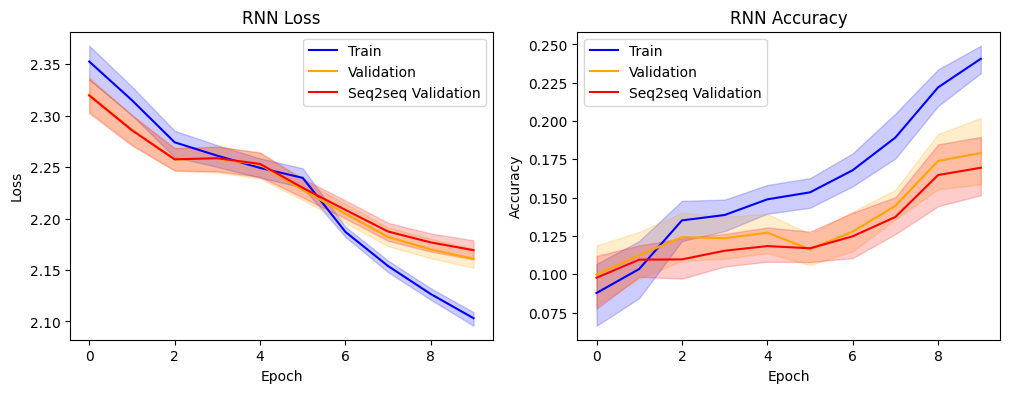

In [19]:
from visualization.plot_model_performance import plot_accuracy_loss

plot_accuracy_loss(histories2, epochs=pre_epochs + c_epochs + ft_epochs)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy: ', balanced_accuracy_score(y_test2_all, y_pred2_all))